# 주택가격 데이터 이상치 정제

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/house_raw.csv')
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


### 기술통계 확인

In [3]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000
mean,27.307022,3.664086,0.214309,3.007667,5.370672,188692.620130
std,11.297204,1.526694,0.055251,4.579534,2.332776,95318.621139
min,1.000000,0.499900,0.100000,0.692308,0.846154,14999.000000
25%,18.000000,2.526125,0.177544,2.467031,4.426115,114325.000000
50%,28.000000,3.447800,0.204256,2.853499,5.199222,170800.000000
75%,36.000000,4.583300,0.240476,3.318866,5.970848,242100.000000
max,51.000000,9.905500,1.000000,599.714286,132.533333,500000.000000


### 변수별 히스토그램
- bedrooms, households, rooms를 보면 오른쪽에 큰 값들이 존재하여 왼쪽에 자료가 몰려있음을 확인할 수 있음

array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

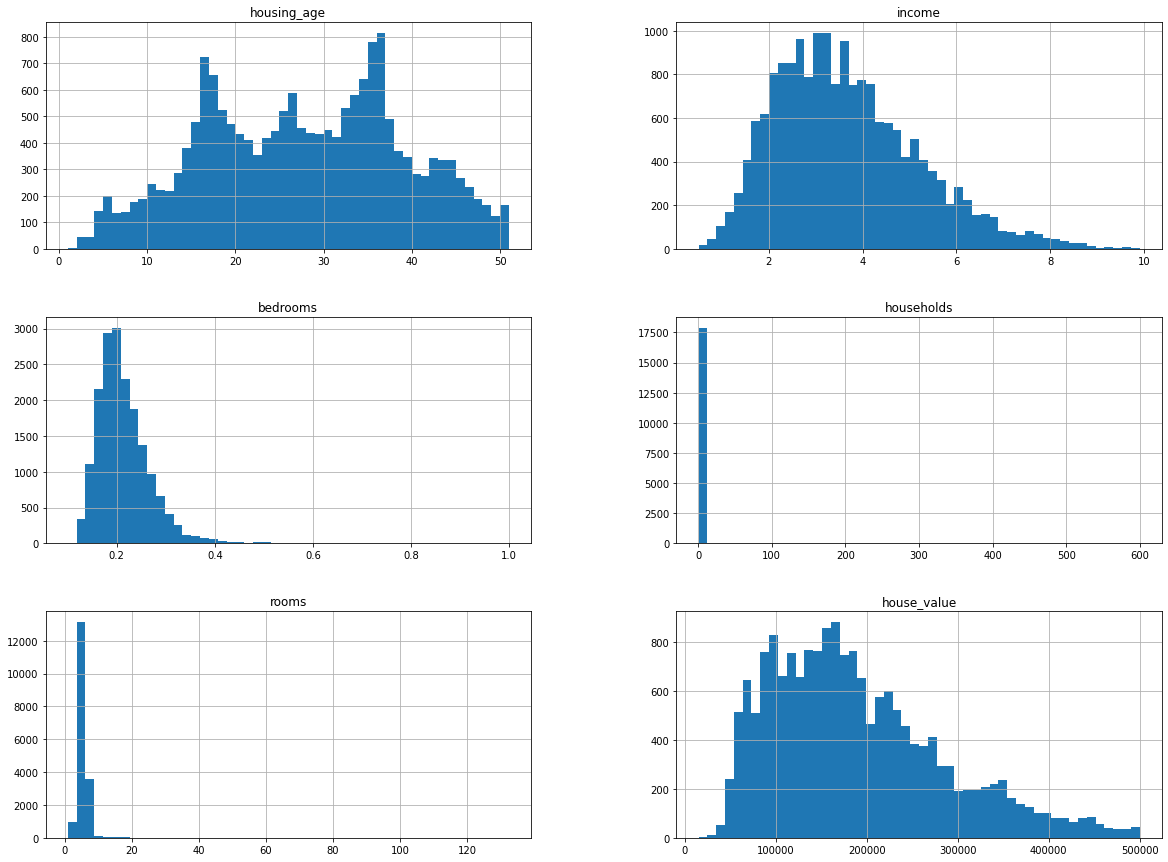

In [4]:
data.hist(bins=50, figsize=(20,15))

## 정제 전 데이터로 선형회귀 적용해 보기

In [5]:
X = data[data.columns[:5]]
Y = data[["house_value"]]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

### 데이터 정규화
- MinMaxScaler 사용했음
- 기준 데이터를 X_train에 맞춤
- train 데이터와 test 데이터를 정규화함

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

### 선형 회귀 모델 적용

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_scaled_minmax_train, Y_train)

LinearRegression()

### 모델 정확도 확인
- 테스트 데이터에 문제가 있는듯 하다...
- 이상치를 제거하고 다시 해야할 것 같다

In [9]:
pred_train = model.predict(X_scaled_minmax_train)  # X값 넣고 예측하기
model.score(X_scaled_minmax_train, Y_train)  # X, Y 데이터 넣고 내부에서 예측한 값과 비교해서 점수 측정

0.5463729131516732

In [10]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, Y_test)

-2.822064801016142

## 데이터 정제를 위한 고찰

### bedrooms 컬럼
- 박스플롯 확인해 보니 0.6 이상인 값은 제거해도 될 것 같음

<AxesSubplot:>

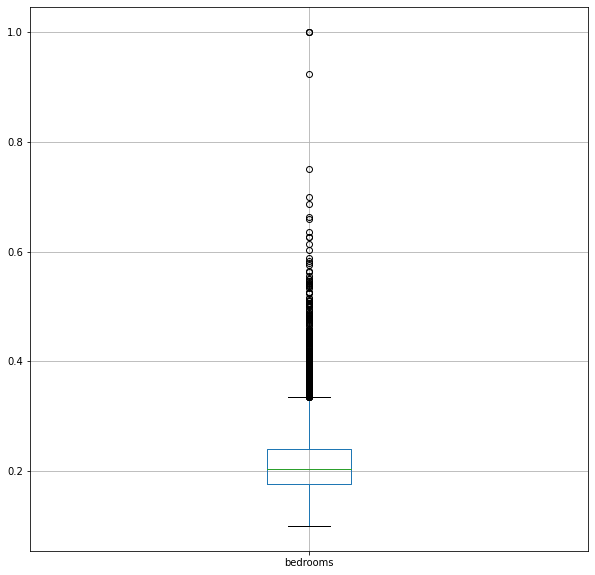

In [11]:
data.boxplot(column='bedrooms', figsize=(10,10))

### 이상치 제거 전후 비교

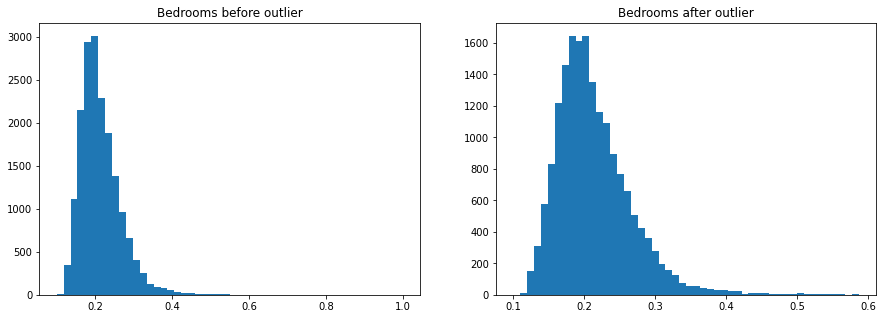

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Bedrooms before outlier")
plt.hist(data['bedrooms'], bins=50)

plt.subplot(122)
plt.title("Bedrooms after outlier")
data_bedroom = data[data['bedrooms']<0.6]
plt.hist(data_bedroom['bedrooms'], bins=50)
plt.show()

### 이상치 데이터 확인
- 14개밖에 없어서 지워도 큰 문제 없어 보임

In [13]:
data_bedrooms_outlier = data[data['bedrooms']>=0.6]
data_bedrooms_outlier

,housing_age,income,bedrooms,households,rooms,house_value
1732,43,1.3157,0.602489,2.133660,1.911826,333300
1911,25,1.7866,0.635258,3.566327,1.678571,325000
3162,26,1.4904,0.658869,3.750779,1.598131,275000
3165,12,1.2012,0.613084,3.271233,1.465753,275000
5446,24,1.8304,0.662539,3.973545,1.708995,225000
7674,45,1.4940,0.625887,3.673981,1.768025,187500
7677,20,1.0938,0.923077,1.739130,1.130435,187500
9658,46,2.8750,1.000000,1.846154,0.846154,162500
9716,16,0.5360,1.000000,18.444444,2.111111,162500
11810,37,2.7634,0.700000,4.524194,1.411290,137500


In [14]:
print(f"{len(data_bedrooms_outlier)}/{len(data)}")

14/17914


---

### households 컬럼
- 박스플롯 확인해 보니 10 이상인 값은 제거해도 될 것 같음

<AxesSubplot:>

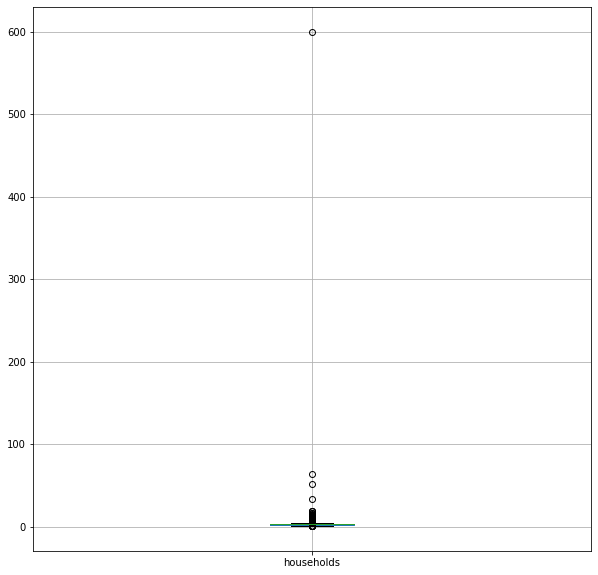

In [15]:
data.boxplot(column='households', figsize=(10,10))

### 이상치 제거 전후 비교

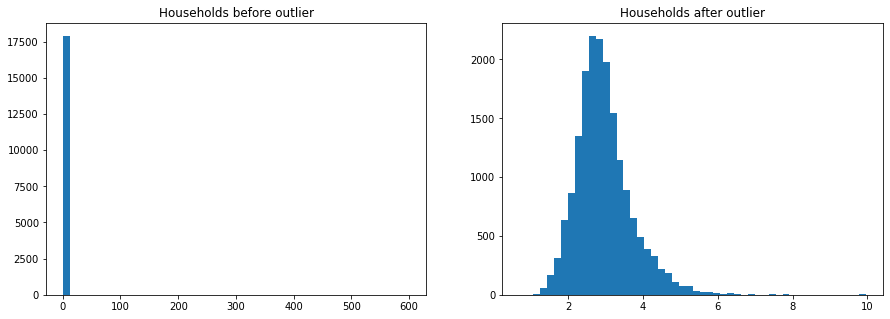

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Households before outlier")
plt.hist(data['households'], bins=50)

plt.subplot(122)
plt.title("Households after outlier")
data_bedroom = data[data['households']<10]
plt.hist(data_bedroom['households'], bins=50)
plt.show()

### 이상치 데이터 확인
- 22개밖에 없어서 지워도 큰 문제 없어 보임

In [17]:
data_households_outlier = data[data['households']>=10]
data_households_outlier

,housing_age,income,bedrooms,households,rooms,house_value
2420,20,1.0298,0.338658,13.693487,2.398467,300000
5398,33,3.8750,0.218310,12.234043,3.021277,225000
8003,36,4.2578,0.212528,33.952941,5.258824,183300
9617,26,5.7485,0.167702,51.400000,5.366667,162500
9625,36,4.6250,0.142857,14.000000,24.500000,162500
9703,8,1.6250,0.125000,63.750000,7.600000,162500
9713,19,0.9573,0.338843,16.048780,2.951220,162500
9716,16,0.5360,1.000000,18.444444,2.111111,162500
11397,13,3.4107,0.218182,12.843750,5.156250,142500
11987,41,3.5769,0.222672,18.500000,4.940000,135700


In [18]:
print(f"{len(data_households_outlier)}/{len(data)}")

22/17914


---

### rooms 컬럼
- 박스플롯 확인해 보니 20 이상인 값은 제거해도 될 것 같음

<AxesSubplot:>

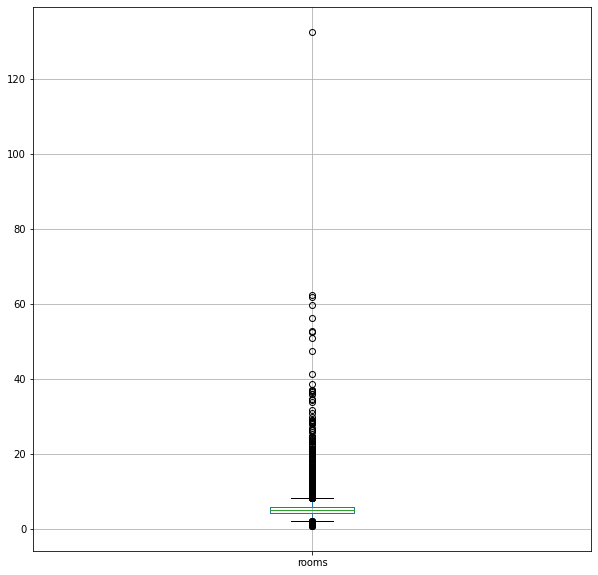

In [19]:
data.boxplot(column='rooms', figsize=(10,10))

### 이상치 제거 전후 비교

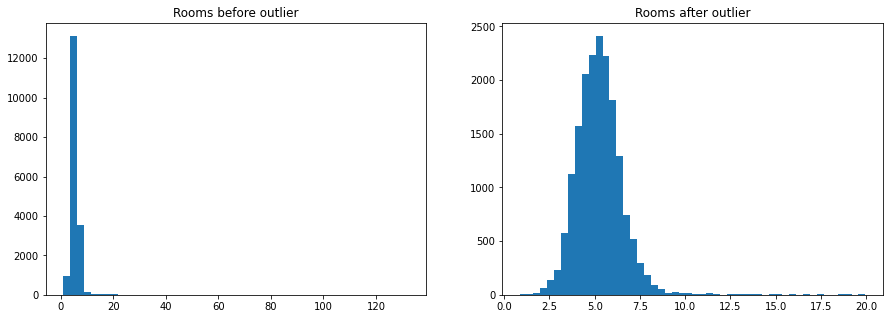

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Rooms before outlier")
plt.hist(data['rooms'], bins=50)

plt.subplot(122)
plt.title("Rooms after outlier")
data_bedroom = data[data['rooms']<20]
plt.hist(data_bedroom['rooms'], bins=50)
plt.show()

### 이상치 데이터 확인
- 64개밖에 없어서 지워도 큰 문제 없어 보임

In [21]:
data_rooms_outlier = data[data['rooms']>=20]
data_rooms_outlier

,housing_age,income,bedrooms,households,rooms,house_value
324,19,4.0714,0.177958,2.333333,61.812500,437500
457,17,2.1719,0.172918,2.581818,28.600000,420000
1140,18,5.5456,0.146182,2.273585,36.075472,360000
2146,17,3.9722,0.172642,2.608355,20.900783,313400
2858,14,4.1016,0.175109,2.136364,20.939394,283300
...,...,...,...,...,...,...
16222,11,3.1250,0.235332,2.484848,47.515152,77500
16429,16,0.4999,0.277372,1.368421,21.631579,73500
16584,10,3.1250,0.250564,2.285714,21.095238,71300
16844,25,2.6250,0.255741,1.750000,59.875000,67500


In [22]:
print(f"{len(data_rooms_outlier)}/{len(data)}")

64/17914


---

## 정제 데이터셋 생성

In [23]:
new_data = data[(data['bedrooms']<0.5) & (data['households']<7) & (data['rooms']<12)] # 기존 이상치 값보다 조금 더 타이트하게 잡음
new_data

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000
...,...,...,...,...,...,...
17907,34,2.3013,0.214583,2.748299,4.897959,26600
17909,33,2.6750,0.246622,3.428571,4.698413,22500
17910,39,2.3667,0.340771,1.876812,3.572464,17500
17911,19,2.1000,0.386107,2.987805,3.774390,14999


In [24]:
new_data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


### 기존 데이터와 정제한 데이터 히스토그램 차이

array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

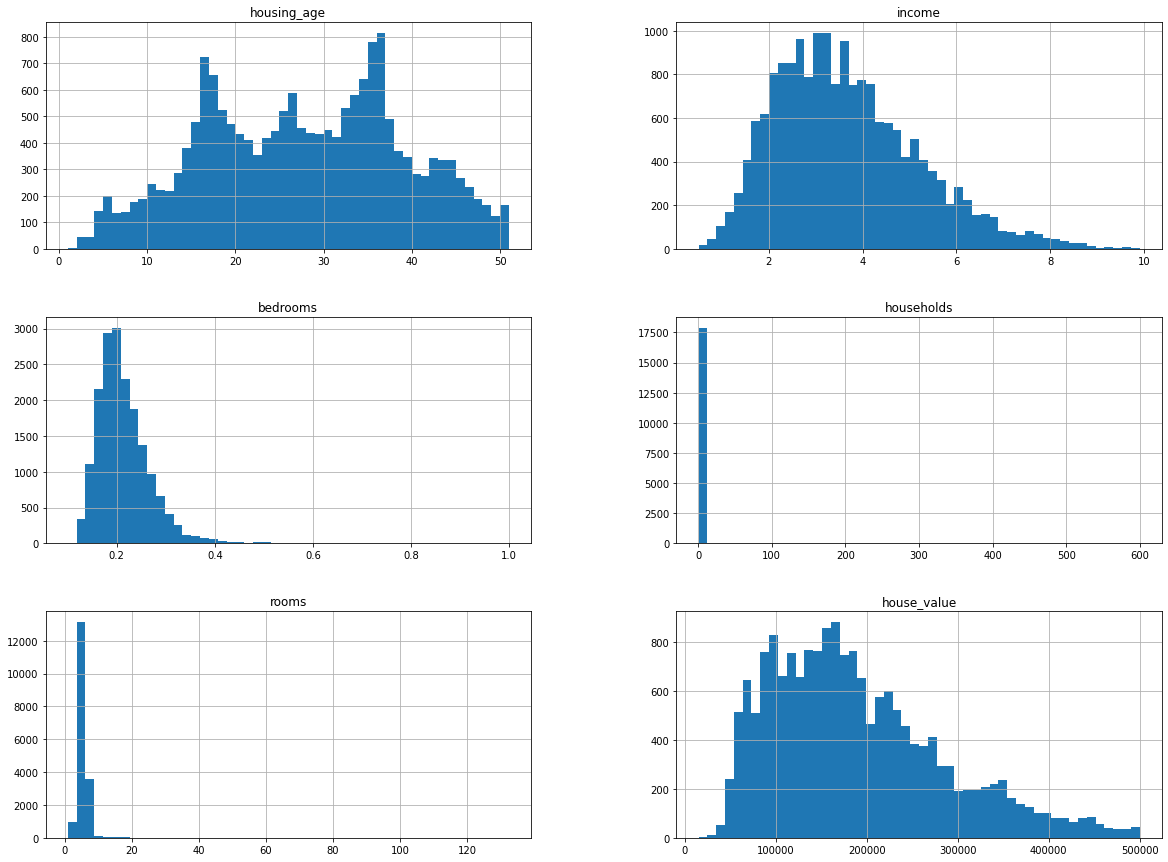

In [25]:
data.hist(bins=50, figsize=(20, 15))

array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

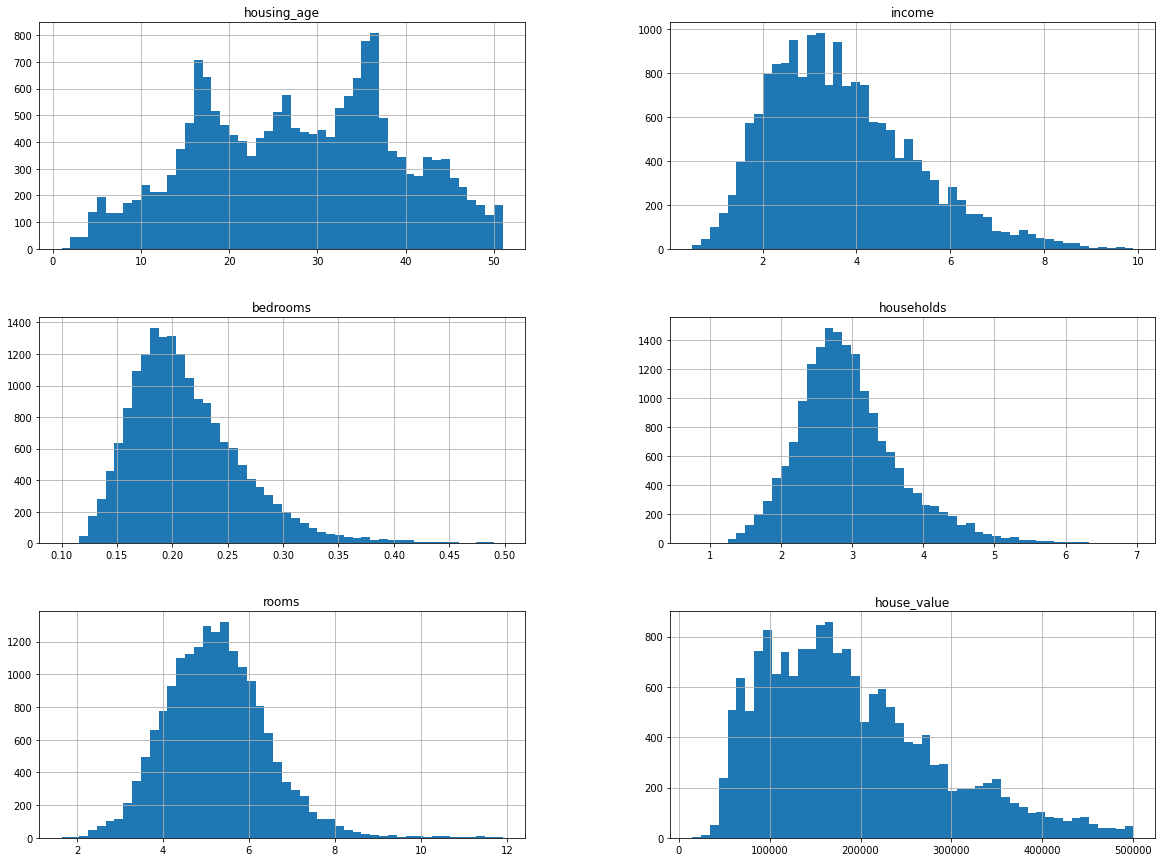

In [26]:
new_data.hist(bins=50, figsize=(20,15))

## 정제된 데이터로 선형회귀 적용해 보기

In [27]:
X = new_data[new_data.columns[:5]]
Y = new_data[["house_value"]]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()

scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled_minmax_train, Y_train)

print("훈련 데이터 정확도:", model.score(X_scaled_minmax_train, Y_train))

print("테스트 데이터 정확도:", model.score(X_scaled_minmax_test, Y_test))

훈련 데이터 정확도: 0.5706921210926263
테스트 데이터 정확도: 0.5826083517811866


### 정제된 데이터 저장

In [28]:
new_data.to_csv('data/house_price.csv', index=False)

## 결론
- 훈련 데이터 정확도 0.55 => 0.57로 아주 약간 증가
- 테스트 데이터 정확도 -2.82 => 0.58로 엄청 증가
- 문제를 줄 수 있는 데이터의 전처리를 해주어 더 정확한 모델을 만들 수 있음